In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

## Problem 9.1 Data clustering

In [2]:
data = np.loadtxt('data.txt', delimiter=',')
coord = data[:,1:]
time = data[:,0]

Text(0.5,1,'Brownian simulation trajectory')

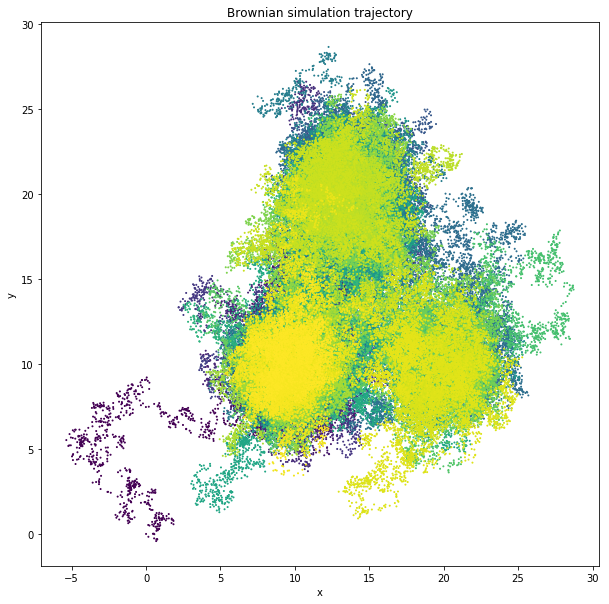

In [3]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(*coord.T, c=time, s=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Brownian simulation trajectory')

(array([[5.0000e+00, 9.3000e+01, 1.3200e+02, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.3500e+02, 7.3000e+01, 7.5000e+01, 2.7000e+01, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [5.7000e+01, 6.6000e+01, 1.1300e+02, 1.7400e+02, 2.9200e+02,
         8.6000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [3.8000e+01, 2.8900e+02, 3.9350e+03, 1.3840e+04, 3.3960e+03,
         5.4900e+02, 2.1500e+02, 5.1000e+01, 2.9000e+01, 0.0000e+00],
        [0.0000e+00, 3.5600e+02, 1.4021e+04, 5.3259e+04, 1.6012e+04,
         5.5170e+03, 9.0660e+03, 8.7840e+03, 1.0150e+03, 1.3400e+02],
        [5.3000e+01, 1.5800e+02, 2.2490e+03, 8.6210e+03, 5.9510e+03,
         6.4100e+03, 3.4714e+04, 4.1073e+04, 4.6980e+03, 1.6000e+02],
        [2.0000e+01, 4.3300e+02, 1.8630e+03, 5.4040e+03, 4.7030e+03,
         3.6940e+03, 8.4790e+03, 7.1980e+03, 1.4520e+03, 6.7000e+01],
        [0.0000e+00, 2.0300

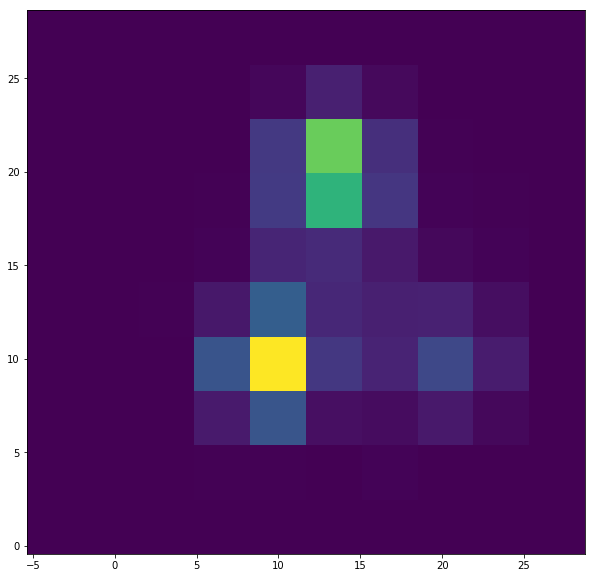

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.hist2d(coord[:, 0], coord[:, 1], bins=10)

## Problem 9.2 Principal component analysis

In [5]:
def load_traj(file):
    with open(file,'r') as f:
        file = [line.rstrip('\n') for line in f]
        traj = []

        for i in range(0, len(file), 9):
            coordinates = file[i+2: i+9]
            traj.append(coordinates)
        traj = np.array(traj)

        dtraj = []
        for i in range(len(traj)):
            block = []
            for k in range(len(traj[i])):
                row = traj[i][k].split()
                row = row[1:]
                block.append(row)
            dtraj.append(block)
        dtraj = np.array(dtraj, dtype=np.float32)

    return dtraj

In [6]:
traj = load_traj('traj.xyz')

In [7]:
print(traj.shape)

(1003, 7, 3)


#### a) Calculate the mean value 𝜇 for each of the 3×7 coordinates


In [8]:
mean = np.mean(traj)
print(mean)

15.088093


#### b) Calculate the mean position for each of the seven atoms, expressed as x,y,z coordinates
expected shape: (7,3)

In [9]:
mean_position = np.mean(traj, axis=0)
print(mean_position)

[[14.860869  15.271106  14.846352 ]
 [14.897954  15.386553  14.840753 ]
 [14.941468  15.412378  14.855765 ]
 [14.918407  15.341759  14.876946 ]
 [15.002149  15.511715  14.846346 ]
 [15.057123  15.5485325 14.857031 ]
 [15.069298  15.628423  14.879002 ]]


#### c) Set up the covariance matrix C of all the 21 coordinates (𝑟=x,z, or y)  𝐶𝑖𝑗 = ⟨(𝑟𝑖 − 𝜇𝑖)(𝑟𝑗 − 𝜇𝑗)⟩

In [10]:
c = np.cov(mean_position.T)

In [11]:
print(c)

[[0.00646653 0.00978915 0.00053386]
 [0.00978915 0.01569363 0.00068615]
 [0.00053386 0.00068615 0.00022881]]


In [12]:
print(np.around(c, 3))

[[0.006 0.01  0.001]
 [0.01  0.016 0.001]
 [0.001 0.001 0.   ]]


$$COV=\begin{bmatrix}
    0.006 & 0.01 & 0.001\\
    0.01  & 0.016  & 0.001  \\
    0.001  & 0.001  & 0  \\
\end{bmatrix}$$

In [13]:
def get_eigen(M):
    w, v = np.linalg.eig(M)
    v = v.T
    eig_val = np.sort(w)[::-1]
    eig_vec = np.array([v[np.where(eig_val[i] == w)] for i in range(len(eig_val))])
    return eig_val, eig_vec

def print_eigen(eig_val, eig_vec):
    for w, v in zip(eig_val, eig_vec):
        print('Eigenvalue: ', np.around(w, 4), '; With eigenvector: ', np.around(v, 3))

In [14]:
eig_val, eig_vec = get_eigen(c)
print_eigen(eig_val, eig_vec)

Eigenvalue:  0.0219 ; With eigenvector:  [[-0.535 -0.844 -0.04 ]]
Eigenvalue:  0.0003 ; With eigenvector:  [[-0.684  0.461 -0.566]]
Eigenvalue:  0.0001 ; With eigenvector:  [[-0.496  0.276  0.823]]


In [15]:
X = traj.reshape(-1,21)

In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [17]:
print(X_pca)

[[-18.165686  33.439625]
 [-18.54206   22.152256]
 [-10.456131  28.851864]
 ...
 [ 11.55323   29.492609]
 [ 17.071012  26.959505]
 [ 16.972923  27.314562]]


Text(0.5,1,'Data points of the projected two-dimensional trajectory')

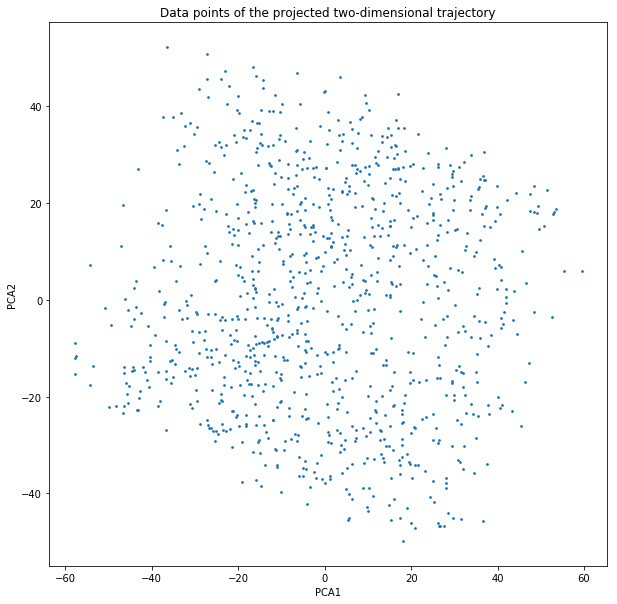

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(*X_pca.T, s=3)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Data points of the projected two-dimensional trajectory')

Text(0.5,1,'Time series of data points projected onto PC1')

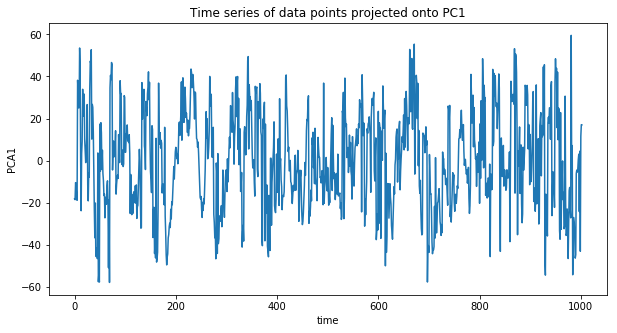

In [19]:
plt.figure(figsize=(10,5))
plt.plot(X_pca[:,0])
plt.xlabel('time')
plt.ylabel('PCA1')
plt.title('Time series of data points projected onto PC1')

Text(0.5,1,'Time series of data points projected onto PC2')

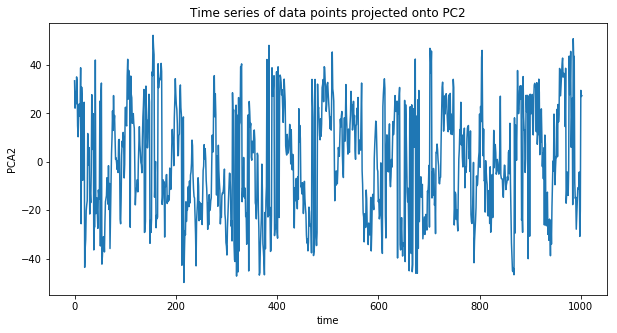

In [20]:
plt.figure(figsize=(10,5))
plt.plot(X_pca[:,1])
plt.xlabel('time')
plt.ylabel('PCA2')
plt.title('Time series of data points projected onto PC2')